In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [2]:
allparam = [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D30bde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D20bde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D10bde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')]
Leqid = len(allparam)
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D5sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D10sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D15sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D20sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D30sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D40sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D50sde_TV')]
Lin128 = LinData.LinData_Class(allparam[0])
alldata = [pd.read_table(param['datapath']+'h5_data.csv', delimiter=',') for param in allparam]

allparam64 = [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D30bde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D20bde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D10bde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D5sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D10sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D15sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D20sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D30sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D40sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D50sde_TV')]
Lin64 = LinData.LinData_Class(allparam64[0])
alldata64 = [pd.read_table(param['datapath']+'h5_data.csv', delimiter=',') for param in allparam64]

allparam32 = [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D30bde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D20bde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D10bde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D5sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D10sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D15sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D20sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D30sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D40sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D50sde_TV')]
Lin32 = LinData.LinData_Class(allparam32[0])
alldata32 = [pd.read_table(param['datapath']+'h5_data.csv', delimiter=',') for param in allparam32]

Lx = np.array([paramdata['Lx'] for paramdata in allparam])

 read time file
 read time file
 read time file


In [3]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    if len(f32)!=len(f128):
        f32 = interpolate(interpolate(f32))
        while len(f32)<len(f128):
            f32 = extrapolate(f32)
        while len(f32)>len(f128):
            f32 = f32[:-1]
    if len(f64)!=len(f128):
        f64 = interpolate(f64)
        while len(f64)<len(f128):
            f64 = extrapolate(f64)
        while len(f64)>len(f128):
            f64 = f64[:-1]
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

0
['it', 't', 'gdet_av', 'gdet_L1', 'gdet_var', 'gdet_OD', 'gdet_midOD', 'gdet_cent', 'gdet_midUD', 'gdet_UD', 'gdet_max', 'gdet_min', 'gxx_av', 'gxx_L1', 'gxx_var', 'gxx_OD', 'gxx_midOD', 'gxx_cent', 'gxx_midUD', 'gxx_UD', 'gxx_max', 'gxx_min', 'a_av', 'a_L1', 'a_var', 'a_OD', 'a_midOD', 'a_cent', 'a_midUD', 'a_UD', 'a_max', 'a_min', 'RicciS_av', 'RicciS_L1', 'RicciS_var', 'RicciS_OD', 'RicciS_midOD', 'RicciS_cent', 'RicciS_midUD', 'RicciS_UD', 'RicciS_max', 'RicciS_min', 'RicciS_L1error', 'rho_u_av', 'rho_u_L1', 'rho_u_var', 'rho_u_OD', 'rho_u_midOD', 'rho_u_cent', 'rho_u_midUD', 'rho_u_UD', 'rho_u_max', 'rho_u_min', 'Kxx_av', 'Kxx_L1', 'Kxx_var', 'Kxx_OD', 'Kxx_midOD', 'Kxx_cent', 'Kxx_midUD', 'Kxx_UD', 'Kxx_max', 'Kxx_min', 'K_av', 'K_L1', 'K_var', 'K_OD', 'K_midOD', 'K_cent', 'K_midUD', 'K_UD', 'K_max', 'K_min', 'A2_av', 'A2_L1', 'A2_var', 'A2_OD', 'A2_midOD', 'A2_cent', 'A2_midUD', 'A2_UD', 'A2_max', 'A2_min', 'Q', 'tau', 'a', 'an', 'H', 'z', 'drho_u_av', 'dgdet_av', 'dK_av', 'dd

KeyError: 'B2_OD'

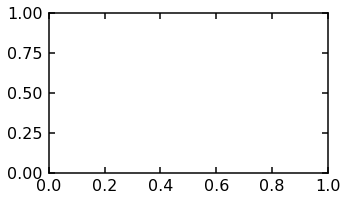

In [4]:
colors = plt.cm.viridis(np.linspace(0, 1, len(Lx)))
alphafac = 0.5

plt.figure(figsize=(5, 10))
plt.subplot(311)
i = 0
for d128, d64, d32, c in zip(alldata, alldata64, alldata32, colors):
    print(i)
    H2 = Lin128.evo.Hprop(d128['t'])**2
    an128 = Lin128.an_initial(d128['t'])
    print(list(d128.keys()))
    print()
    print(list(d64.keys()))
    print()
    print(list(d32.keys()))
    plt.semilogy(an128, np.sqrt(d128['B2_OD'])/H2, color=c)
    err = get_error(d32['B2_OD'], d64['B2_OD'], d128['B2_OD'])
    plt.fill_between(an128, np.sqrt(d128['B2_OD']-err)/H2, np.sqrt(d128['B2_OD']+err)/H2, color=c, alpha=alphafac)
    i += 1
plt.ylabel(r'$|B|_{OD}/H^2$')
plt.grid()
plt.xticks(color='w')

plt.subplot(312)
for d128, d64, d32, c in zip(alldata, alldata64, alldata32, colors):
    H2 = Lin128.evo.Hprop(d128['t'])**2
    an128 = Lin128.an_initial(d128['t'])
    plt.semilogy(an128, np.sqrt(d128['B2_max'])/H2, color=c)
    err = get_error(d32['B2_max'], d64['B2_max'], d128['B2_max'])
    plt.fill_between(an128, np.sqrt(d128['B2_max']-err)/H2, np.sqrt(d128['B2_max']+err)/H2, color=c, alpha=alphafac)
plt.ylabel(r'$max(|B|)/H^2$')
plt.grid()
plt.xticks(color='w')
plt.ylim(1e-4, 1e5)

plt.subplot(313)
for d128, d64, d32, c in zip(alldata, alldata64, alldata32, colors):
    H2 = Lin128.evo.Hprop(d128['t'])**2
    an128 = Lin128.an_initial(d128['t'])
    plt.semilogy(an128, np.sqrt(d128['B2_av'])/H2, color=c)
    err = get_error(d32['B2_av'], d64['B2_av'], d128['B2_av'])
    plt.fill_between(an128, np.sqrt(d128['B2_av']-err)/H2, np.sqrt(d128['B2_av']+err)/H2, color=c, alpha=alphafac)
plt.ylabel(r'$\langle |B|\rangle_{\mathcal{D}}/H^2$')
plt.xlabel(r'$a/a_{IN}$')
plt.grid()
plt.subplots_adjust(hspace=0)

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/pandas/core/se

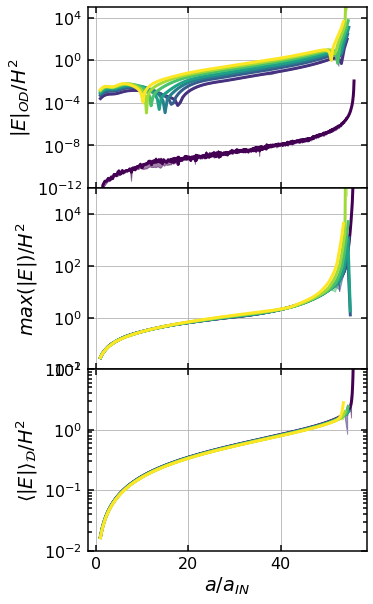

In [10]:
colors = plt.cm.viridis(np.linspace(0, 1, len(Lx)))
alphafac = 0.5

plt.figure(figsize=(5, 10))
plt.subplot(311)
for d128, d64, d32, c in zip(alldata, alldata64, alldata32, colors):
    H2 = Lin128.evo.Hprop(d128['t'])**2
    an128 = Lin128.an_initial(d128['t'])
    plt.semilogy(an128, np.sqrt(d128['E2_OD'])/H2, color=c)
    err = get_error(d32['E2_OD'], d64['E2_OD'], d128['E2_OD'])
    plt.fill_between(an128, np.sqrt(d128['E2_OD']-err)/H2, np.sqrt(d128['E2_OD']+err)/H2, color=c, alpha=alphafac)
plt.ylabel(r'$|E|_{OD}/H^2$')
plt.grid()
plt.xticks(color='w')
plt.ylim(1e-12, 1e5)

plt.subplot(312)
for d128, d64, d32, c in zip(alldata, alldata64, alldata32, colors):
    H2 = Lin128.evo.Hprop(d128['t'])**2
    an128 = Lin128.an_initial(d128['t'])
    plt.semilogy(an128, np.sqrt(d128['E2_max'])/H2, color=c)
    err = get_error(d32['E2_max'], d64['E2_max'], d128['E2_max'])
    plt.fill_between(an128, np.sqrt(d128['E2_max']-err)/H2, np.sqrt(d128['E2_max']+err)/H2, color=c, alpha=alphafac)
plt.ylabel(r'$max(|E|)/H^2$')
plt.grid()
plt.xticks(color='w')
plt.ylim(1e-2, 1e5)

plt.subplot(313)
for d128, d64, d32, c in zip(alldata, alldata64, alldata32, colors):
    H2 = Lin128.evo.Hprop(d128['t'])**2
    an128 = Lin128.an_initial(d128['t'])
    plt.semilogy(an128, np.sqrt(d128['E2_av'])/H2, color=c)
    err = get_error(d32['E2_av'], d64['E2_av'], d128['E2_av'])
    plt.fill_between(an128, np.sqrt(d128['E2_av']-err)/H2, np.sqrt(d128['E2_av']+err)/H2, color=c, alpha=alphafac)
plt.ylabel(r'$\langle |E|\rangle_{\mathcal{D}}/H^2$')
plt.xlabel(r'$a/a_{IN}$')
plt.grid()
plt.ylim(1e-2, 1e1)
plt.subplots_adjust(hspace=0)